### Bulding a Spam Classifier in Python using NLP

---

---







In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
import pandas as pd

In [121]:
# Data set is avaiable in UCI machine learning repository as 'smsspamcollection' 
# we have separated the columns using '\t' and have assigned with different names 
msgs = pd.read_csv('/content/drive/MyDrive/CVS Excel Files /smsspamcollection/SMSSpamCollection',sep='\t',names=["label","message"])

In [122]:
msgs.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [123]:
msgs.isnull().sum()

label      0
message    0
dtype: int64

In [124]:
#Data cleaning and preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [125]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Using stemming and bag of words technique 

In [126]:
# We have used stemming technique here 
ps = PorterStemmer()

In [127]:
len(msgs)

5572

In [128]:
# Creating the Bag of Words
corpus = []
for i in range(0, len(msgs)):
    msgs_new = re.sub('[^a-zA-Z]', ' ', msgs['message'][i])
    msgs_new = msgs_new.lower()
    msgs_new = msgs_new.split()
    msgs_new = [ps.stem(word) for word in msgs_new if not word in stopwords.words('english')]
    msgs_new = ' '.join(msgs_new)
    corpus.append(msgs_new)   

In [129]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=4500)
X = cv.fit_transform(corpus).toarray()

In [130]:
X.shape

(5572, 4500)

In [131]:
# Converting dependet variables to dummies 
y=pd.get_dummies(msgs['label'])
y=y.iloc[:,1].values

In [132]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [133]:
# Using naive-bayes model
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [134]:
y_pred=spam_detect_model.predict(X_test)

In [135]:
from sklearn.metrics import confusion_matrix,precision_score,f1_score

In [136]:
conf_m =confusion_matrix(y_test,y_pred)

Text(0.5, 1.0, 'Confusion Matrix')

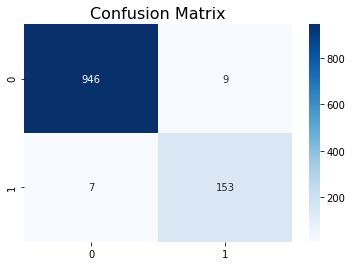

In [137]:
#Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_m,annot=True,cmap='Blues',fmt='g')
plt.title('Confusion Matrix',fontsize=16)

In [138]:
print("F1 Score is {}, and Precision Score is {}".format(f1_score(y_test,y_pred),precision_score(y_test,y_pred)))

F1 Score is 0.9503105590062112, and Precision Score is 0.9444444444444444


# Using Lemmatization and TF-IDF method

In [139]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [140]:
corpus = []
for i in range(0, len(msgs)):
    msgs_new = re.sub('[^a-zA-Z]', ' ', msgs['message'][i])
    msgs_new = msgs_new.lower()
    msgs_new = msgs_new.split()
    msgs_new = [wl.lemmatize(word) for word in msgs_new if not word in stopwords.words('english')]
    msgs_new = ' '.join(msgs_new)
    corpus.append(msgs_new)   

In [141]:
# using ID-IDF method
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()

In [142]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [143]:
# Using naive-bayes model
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

In [144]:
y_pred=spam_detect_model.predict(X_test)

In [145]:
from sklearn.metrics import confusion_matrix,precision_score,f1_score

In [146]:
conf_m =confusion_matrix(y_test,y_pred)

Text(0.5, 1.0, 'Confusion Matrix')

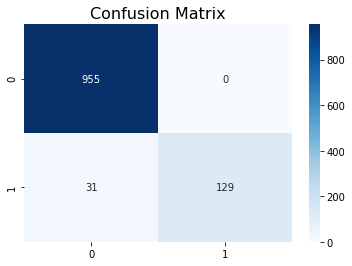

In [147]:
#Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_m,annot=True,cmap='Blues',fmt='g')
plt.title('Confusion Matrix',fontsize=16)

In [148]:
print("F1 Score is {}, and Precision Score is {}".format(f1_score(y_test,y_pred),precision_score(y_test,y_pred)))

F1 Score is 0.8927335640138409, and Precision Score is 1.0
